# Notebook 2 - Extracting XYZ Coordinates from Vector Data
`GemGIS` is a Python-based, open-source geographic information processing library.
It is capable of preprocessing spatial data such as vector data (shape files, geojson files,
geopackages), raster data (tif, png,...), data obtained from web services (WMS, WFS, WCS) or XML/KML
files. Preprocessed data can be stored in a dedicated Data Class to be passed to the geomodeling package
`GemPy` (https://github.com/cgre-aachen/gempy) in order to accelerate to model building process. In addition, enhanced 3D visualization of data is
powered by the `PyVista` (https://github.com/pyvista/pyvista) package.

# Content

[Overview](#overview) <br>
[Load Libraries](#libraries) <br>
[NumPy - Scientific Computing for Python](#numpy) <br>
[Matplotlib - Visualization with Python](#matplotlib) <br>
[Pandas - Python Data Analysis Library](#pandas) <br>
[Shapely - Python package for computational geometry](#shapely) <br>
[GeoPandas](#geopandas) <br>
[rasterio](#rasterio) <br>
[OWSLib](#owslib) <br>
[PyVista - 3D plotting and mesh analysis](#pyvista) <br>
[GemPy - Open-source, implicit 3D structural geological modeling](#gempy) <br>
[Summary](#summary) <br>


<a id='overview'></a>
# Overview

This notebook will present an overview of the most widely used packages in `GemGIS`. The introduced packages are:

- `NumPy` (https://github.com/numpy/numpy)
- `Matplotlib` (https://github.com/matplotlib/matplotlib)
- `Shapely` (https://github.com/Toblerity/Shapely)
- `Pandas`/`GeoPandas` (https://github.com/pandas-dev/pandas / https://github.com/geopandas/geopandas). 
- `rasterio`(https://github.com/mapbox/rasterio)
- `OWSLib`(https://github.com/geopython/OWSLib) 
- `PyVista`(https://github.com/pyvista/pyvista)

The aim of the notebook is to make the user familiar with the most common features of each library used in `GemGIS` to better understand the connections and interactions between the libraries later on. 


<a id='libraries'></a>
# Load Libraries

Firstly, we import all necessary libraries. If you have not installed them yet, follow the installtion tutorial for `GemGIS` or install the packages manually using either PyPi or Anaconda.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import shapely
from shapely.geometry import Point, LineString, MultiLineString, Polygon
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.merge import merge
import owslib
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
from owslib.wcs import WebCoverageService
import pyvista as pv
import gempy as gp
import io
from requests import Request
import urllib.request
from tqdm import tqdm
import sys
import os
import glob
sys.path.append('../../gemgis')
import gemgis as gg
print(gg.__version__)
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


0.2.0
<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='numpy'></a>

# NumPy - Scientific Computing for Python

<img src="../data/Images/numpylogo.png" width="600">

`NumPy` is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

At the core of the `NumPy` package, is the **ndarray** object. This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance. There are several important differences between NumPy arrays and the standard Python sequences:

- NumPy arrays have a fixed size at creation, unlike Python lists (which can grow dynamically). Changing the size of an ndarray will create a new array and delete the original.

- The elements in a NumPy array are all required to be of the same data type, and thus will be the same size in memory. The exception: one can have arrays of (Python, including NumPy) objects, thereby allowing for arrays of different sized elements.

- NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.

- A growing plethora of scientific and mathematical Python-based packages are using NumPy arrays; though these typically support Python-sequence input, they convert such input to NumPy arrays prior to processing, and they often output NumPy arrays. In other words, in order to efficiently use much (perhaps even most) of today’s scientific/mathematical Python-based software, just knowing how to use Python’s built-in sequence types is insufficient - one also needs to know how to use NumPy arrays.


Source: https://numpy.org/doc/stable/user/whatisnumpy.html


For more detailed descriptions about the functionality, please see the `NumPy` documentation at https://numpy.org/doc/

## Creating an array

<img src="../data/Images/nparray.png" width="600">

You can create an array from a regular Python list or tuple using the `array` function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [2]:
a = np.array([7,2,9,10])
a

array([ 7,  2,  9, 10])

In [3]:
a.dtype

dtype('int32')

In [4]:
a.shape

(4,)

In [5]:
b = np.array([[5.2, 3.0, 4.5], [9.1, 0.1, 0.3]])
b

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [6]:
b.dtype

dtype('float64')

In [7]:
b.shape

(2, 3)

In [8]:
c = np.array([
    [[1,2],[4,3],[7,4]], 
    [[2,3],[9,0],[7,5]],
    [[1,2],[3,4],[0,2]],
    [[9,5],[6,7],[9,8]]
])
c

array([[[1, 2],
        [4, 3],
        [7, 4]],

       [[2, 3],
        [9, 0],
        [7, 5]],

       [[1, 2],
        [3, 4],
        [0, 2]],

       [[9, 5],
        [6, 7],
        [9, 8]]])

In [9]:
c.dtype

dtype('int32')

In [10]:
c.shape

(4, 3, 2)

In [11]:
d = np.arange(0,11,1)
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
e = np.linspace(0,10,11)
e

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [13]:
a

array([ 7,  2,  9, 10])

In [14]:
f = a.reshape(2,2)
f

array([[ 7,  2],
       [ 9, 10]])

In [15]:
g = np.zeros([3,3])
g

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
h = np.ones([3,3])
h

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [17]:
a

array([ 7,  2,  9, 10])

In [18]:
a.max()

10

In [19]:
a.min()

2

In [20]:
a.mean()

7.0

In [21]:
a.sum()

28

In [22]:
np.round(1.2345)

1.0

In [23]:
np.round(1.2345,2)

1.23

In [24]:
np.pi

3.141592653589793

In [25]:
np.sqrt(4)

2.0

In [26]:
np.sin(45)

0.8509035245341184

In [27]:
np.rad2deg(np.pi)

180.0

In [28]:
b

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [29]:
b[0]

array([5.2, 3. , 4.5])

In [30]:
b[0][0:2]

array([5.2, 3. ])

In [31]:
b[1]

array([9.1, 0.1, 0.3])

In [32]:
b[:,0]

array([5.2, 9.1])

In [33]:
i = np.vstack((b,b))
i

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3],
       [5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [34]:
l = np.row_stack((b,b))
l

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3],
       [5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [35]:
j = np.hstack((b,b))
j

array([[5.2, 3. , 4.5, 5.2, 3. , 4.5],
       [9.1, 0.1, 0.3, 9.1, 0.1, 0.3]])

In [36]:
k = np.column_stack((b,b))
k

array([[5.2, 3. , 4.5, 5.2, 3. , 4.5],
       [9.1, 0.1, 0.3, 9.1, 0.1, 0.3]])

In [37]:
x = np.arange(0,10,1)
y = np.arange(10,20,1)

xx,yy = np.meshgrid(x,y)

In [38]:
xx

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [39]:
yy

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
       [19, 19, 19, 19, 19, 19, 19, 19, 19, 19]])

In [40]:
y,x = np.gradient(yy)
y,x

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [41]:
b

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [42]:
np.flipud(b)

array([[9.1, 0.1, 0.3],
       [5.2, 3. , 4.5]])

In [43]:
np.fliplr(b)

array([[4.5, 3. , 5.2],
       [0.3, 0.1, 9.1]])

In [44]:
np.rot90(b,1)

array([[4.5, 0.3],
       [3. , 0.1],
       [5.2, 9.1]])

In [45]:
np.random.uniform(0, 10, 10)

array([6.21963811, 8.6582565 , 1.38019526, 3.21751071, 5.17066751,
       6.89952681, 9.25575197, 7.99647225, 7.39072646, 5.37500302])

In [46]:
np.random.normal(0, 5, 10)

array([-8.55265146,  0.72832148,  1.67588345,  3.27503563,  8.06770439,
       -3.54337439,  7.59389496, -1.37619424,  7.47217933, -7.6018726 ])

<a id='matplotlib'></a>
# Matplotlib - Visualization with Python

<img src="../data/Images/matplotliblogo.png" width="600">

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Matplotlib produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.

<img src="../data/Images/matplotlib.png" width="600">

Source: https://matplotlib.org/, https://itom.bitbucket.io/latest/docs/08_scriptLanguage/pymod-matplotlib.html

## Scatter Plots

Text(0.5, 1.0, 'Scatter Plot')

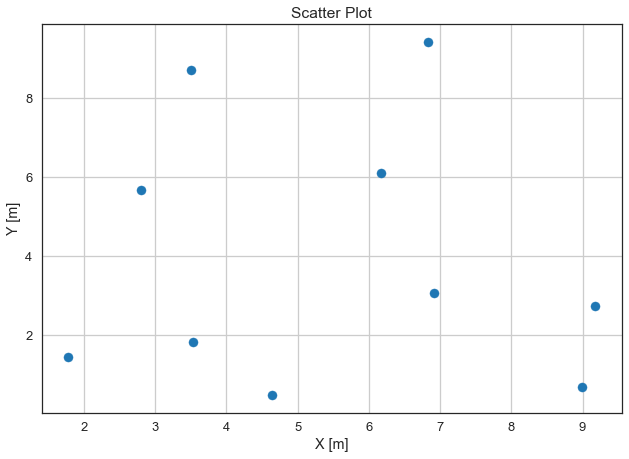

In [47]:
x = np.random.uniform(0, 10, 10)
y = np.random.uniform(0, 10, 10)

plt.scatter(x,y)
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Scatter Plot')

## Line Plots

Text(0.5, 1.0, 'Line Plot')

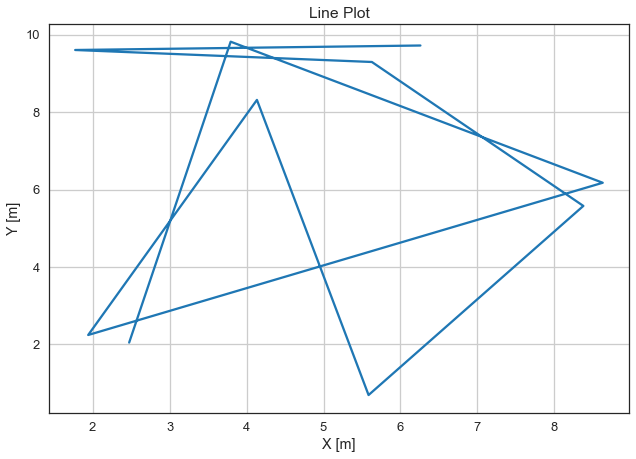

In [48]:
x = np.random.uniform(0, 10, 10)
y = np.random.uniform(0, 10, 10)

plt.plot(x,y)
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Line Plot')

## Subplots stacked vertically

Text(0, 0.5, 'Y [m]')

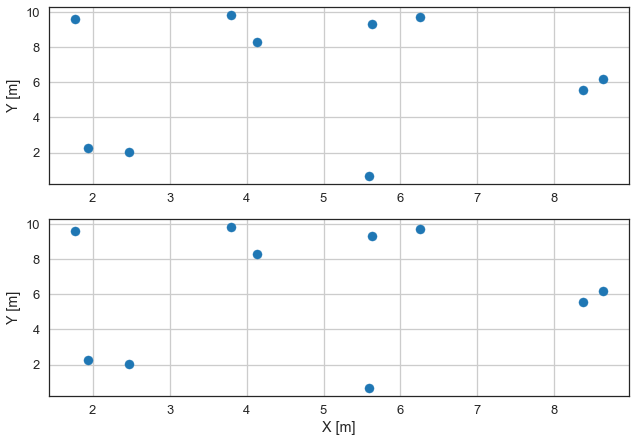

In [49]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.scatter(x,y)
ax1.grid()
ax1.set_ylabel('Y [m]')

ax2.scatter(x,y)
ax2.grid()
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')

## Subplots stacked horizontally

Text(0.5, 0, 'X [m]')

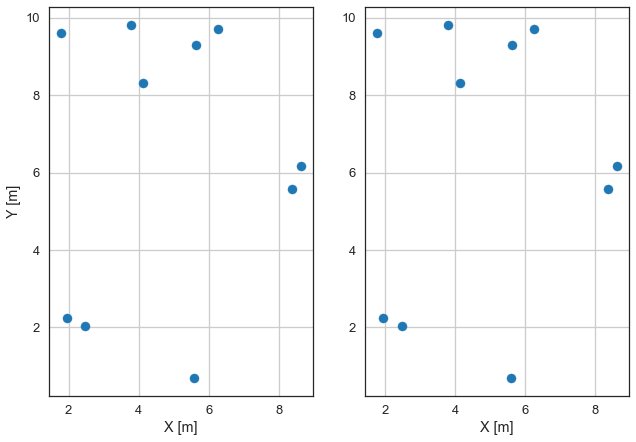

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(x,y)
ax1.grid()
ax1.set_ylabel('Y [m]')
ax1.set_xlabel('X [m]')

ax2.scatter(x,y)
ax2.grid()
ax2.set_xlabel('X [m]')

## Plotting Arrays

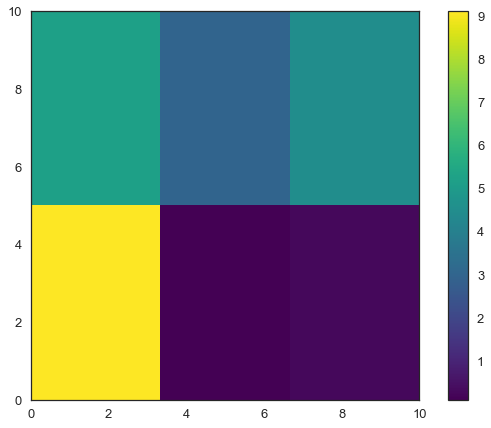

In [51]:
im = plt.imshow(b, cmap='viridis', extent= [0,10,0,10])
plt.colorbar(im)

<a id='pandas'></a>
# Pandas - Python Data Analysis Library


<img src="../data/Images/pandaslogo.png" width="600">

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) time series data.

- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


<img src="../data/Images/pandasdf.png" width="800">

Tutorial Source: https://pandas.pydata.org/docs/user_guide/10min.html, https://medium.com/epfl-extension-school/selecting-data-from-a-pandas-dataframe-53917dc39953

In [52]:
df = pd.DataFrame(np.random.randn(10, 4),  columns=list('ABCD'))
df

A     B     C     D
0  2.71  1.02 -1.60  0.34
1  0.29 -0.16 -0.02  0.46
2  1.32  0.08  1.37  1.53
3  0.72 -0.45  0.60 -2.45
4 -0.32 -0.19  0.68  1.71
5 -0.42  1.26 -0.65 -0.48
6 -0.19 -0.85 -2.60  1.14
7  1.44  1.99  0.62 -0.52
8 -1.27 -1.10  0.03  2.42
9  0.40 -0.70 -1.88  0.48

In [53]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [54]:
df.describe()

A     B     C     D
count 10.00 10.00 10.00 10.00
mean   0.47  0.09 -0.35  0.46
std    1.14  1.01  1.30  1.39
min   -1.27 -1.10 -2.60 -2.45
25%   -0.28 -0.64 -1.36 -0.28
50%    0.34 -0.17  0.00  0.47
75%    1.17  0.79  0.61  1.44
max    2.71  1.99  1.37  2.42

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10 non-null     float64
 1   B       10 non-null     float64
 2   C       10 non-null     float64
 3   D       10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes


In [56]:
df.head()

A     B     C     D
0  2.71  1.02 -1.60  0.34
1  0.29 -0.16 -0.02  0.46
2  1.32  0.08  1.37  1.53
3  0.72 -0.45  0.60 -2.45
4 -0.32 -0.19  0.68  1.71

In [57]:
df.tail()

A     B     C     D
5 -0.42  1.26 -0.65 -0.48
6 -0.19 -0.85 -2.60  1.14
7  1.44  1.99  0.62 -0.52
8 -1.27 -1.10  0.03  2.42
9  0.40 -0.70 -1.88  0.48

In [58]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [59]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [60]:
df['A']

0    2.71
1    0.29
2    1.32
3    0.72
4   -0.32
5   -0.42
6   -0.19
7    1.44
8   -1.27
9    0.40
Name: A, dtype: float64

In [61]:
df['A'].values

array([ 2.71377485,  0.29066969,  1.32181905,  0.72183193, -0.31576123,
       -0.41925666, -0.1892652 ,  1.44275904, -1.266882  ,  0.39688675])

In [62]:
df['A'].to_list()

[2.7137748461439877,
 0.29066968678659044,
 1.3218190497235265,
 0.7218319328612745,
 -0.3157612274087856,
 -0.41925665597105816,
 -0.18926519778975182,
 1.4427590407754167,
 -1.266881996274155,
 0.39688675494438874]

In [63]:
df.to_numpy()

array([[ 2.71377485,  1.01885627, -1.60013573,  0.34390714],
       [ 0.29066969, -0.15887828, -0.02335663,  0.46448718],
       [ 1.32181905,  0.08403685,  1.37396467,  1.53325925],
       [ 0.72183193, -0.4456726 ,  0.59601674, -2.45309311],
       [-0.31576123, -0.1852394 ,  0.68486314,  1.70976411],
       [-0.41925666,  1.2552788 , -0.65173475, -0.4833141 ],
       [-0.1892652 , -0.84573631, -2.59966252,  1.14092595],
       [ 1.44275904,  1.98866617,  0.61669784, -0.51767223],
       [-1.266882  , -1.09966819,  0.03114312,  2.42167443],
       [ 0.39688675, -0.70476377, -1.87859759,  0.48143501]])

In [64]:
df.T

0     1    2     3     4     5     6     7     8     9
A  2.71  0.29 1.32  0.72 -0.32 -0.42 -0.19  1.44 -1.27  0.40
B  1.02 -0.16 0.08 -0.45 -0.19  1.26 -0.85  1.99 -1.10 -0.70
C -1.60 -0.02 1.37  0.60  0.68 -0.65 -2.60  0.62  0.03 -1.88
D  0.34  0.46 1.53 -2.45  1.71 -0.48  1.14 -0.52  2.42  0.48

In [65]:
df.sort_values(by='B')

A     B     C     D
8 -1.27 -1.10  0.03  2.42
6 -0.19 -0.85 -2.60  1.14
9  0.40 -0.70 -1.88  0.48
3  0.72 -0.45  0.60 -2.45
4 -0.32 -0.19  0.68  1.71
1  0.29 -0.16 -0.02  0.46
2  1.32  0.08  1.37  1.53
0  2.71  1.02 -1.60  0.34
5 -0.42  1.26 -0.65 -0.48
7  1.44  1.99  0.62 -0.52

In [66]:
df[0:3]

A     B     C    D
0 2.71  1.02 -1.60 0.34
1 0.29 -0.16 -0.02 0.46
2 1.32  0.08  1.37 1.53

In [67]:
df.loc[1]

A    0.29
B   -0.16
C   -0.02
D    0.46
Name: 1, dtype: float64

In [68]:
df.iloc[3]

A    0.72
B   -0.45
C    0.60
D   -2.45
Name: 3, dtype: float64

In [69]:
df[df['A'] >0]

A     B     C     D
0 2.71  1.02 -1.60  0.34
1 0.29 -0.16 -0.02  0.46
2 1.32  0.08  1.37  1.53
3 0.72 -0.45  0.60 -2.45
7 1.44  1.99  0.62 -0.52
9 0.40 -0.70 -1.88  0.48

In [70]:
df['E'] = 1
df.head()

A     B     C     D  E
0  2.71  1.02 -1.60  0.34  1
1  0.29 -0.16 -0.02  0.46  1
2  1.32  0.08  1.37  1.53  1
3  0.72 -0.45  0.60 -2.45  1
4 -0.32 -0.19  0.68  1.71  1

In [71]:
df['F'] = np.arange(1,11,1)
df.head()

A     B     C     D  E  F
0  2.71  1.02 -1.60  0.34  1  1
1  0.29 -0.16 -0.02  0.46  1  2
2  1.32  0.08  1.37  1.53  1  3
3  0.72 -0.45  0.60 -2.45  1  4
4 -0.32 -0.19  0.68  1.71  1  5

In [72]:
df[df['A'] >0].reset_index()

index    A     B     C     D  E   F
0      0 2.71  1.02 -1.60  0.34  1   1
1      1 0.29 -0.16 -0.02  0.46  1   2
2      2 1.32  0.08  1.37  1.53  1   3
3      3 0.72 -0.45  0.60 -2.45  1   4
4      7 1.44  1.99  0.62 -0.52  1   8
5      9 0.40 -0.70 -1.88  0.48  1  10

In [73]:
df['G'] = None
df.head()

A     B     C     D  E  F     G
0  2.71  1.02 -1.60  0.34  1  1  None
1  0.29 -0.16 -0.02  0.46  1  2  None
2  1.32  0.08  1.37  1.53  1  3  None
3  0.72 -0.45  0.60 -2.45  1  4  None
4 -0.32 -0.19  0.68  1.71  1  5  None

In [74]:
df.dropna()

Empty DataFrame
Columns: [A, B, C, D, E, F, G]
Index: []

In [75]:
df

A     B     C     D  E   F     G
0  2.71  1.02 -1.60  0.34  1   1  None
1  0.29 -0.16 -0.02  0.46  1   2  None
2  1.32  0.08  1.37  1.53  1   3  None
3  0.72 -0.45  0.60 -2.45  1   4  None
4 -0.32 -0.19  0.68  1.71  1   5  None
5 -0.42  1.26 -0.65 -0.48  1   6  None
6 -0.19 -0.85 -2.60  1.14  1   7  None
7  1.44  1.99  0.62 -0.52  1   8  None
8 -1.27 -1.10  0.03  2.42  1   9  None
9  0.40 -0.70 -1.88  0.48  1  10  None

In [76]:
df.mean()

A    0.47
B    0.09
C   -0.35
D    0.46
E    1.00
F    5.50
G     nan
dtype: float64

In [77]:
df.sum()

A    4.70
B    0.91
C   -3.45
D    4.64
E   10.00
F   55.00
G    0.00
dtype: float64

In [78]:
pd.concat([df, df]).reset_index()

index     A     B     C     D  E   F     G
0       0  2.71  1.02 -1.60  0.34  1   1  None
1       1  0.29 -0.16 -0.02  0.46  1   2  None
2       2  1.32  0.08  1.37  1.53  1   3  None
3       3  0.72 -0.45  0.60 -2.45  1   4  None
4       4 -0.32 -0.19  0.68  1.71  1   5  None
5       5 -0.42  1.26 -0.65 -0.48  1   6  None
6       6 -0.19 -0.85 -2.60  1.14  1   7  None
7       7  1.44  1.99  0.62 -0.52  1   8  None
8       8 -1.27 -1.10  0.03  2.42  1   9  None
9       9  0.40 -0.70 -1.88  0.48  1  10  None
10      0  2.71  1.02 -1.60  0.34  1   1  None
11      1  0.29 -0.16 -0.02  0.46  1   2  None
12      2  1.32  0.08  1.37  1.53  1   3  None
13      3  0.72 -0.45  0.60 -2.45  1   4  None
14      4 -0.32 -0.19  0.68  1.71  1   5  None
15      5 -0.42  1.26 -0.65 -0.48  1   6  None
16      6 -0.19 -0.85 -2.60  1.14  1   7  None
17      7  1.44  1.99  0.62 -0.52  1   8  None
18      8 -1.27 -1.10  0.03  2.42  1   9  None
19      9  0.40 -0.70 -1.88  0.48  1  10  None

In [79]:
df2 = df.copy(deep=True)
df2['A'] = 1.0
df2['B']= 2.0

pd.merge(df, df2, how='outer')

A     B     C     D  E   F     G
0   2.71  1.02 -1.60  0.34  1   1  None
1   0.29 -0.16 -0.02  0.46  1   2  None
2   1.32  0.08  1.37  1.53  1   3  None
3   0.72 -0.45  0.60 -2.45  1   4  None
4  -0.32 -0.19  0.68  1.71  1   5  None
5  -0.42  1.26 -0.65 -0.48  1   6  None
6  -0.19 -0.85 -2.60  1.14  1   7  None
7   1.44  1.99  0.62 -0.52  1   8  None
8  -1.27 -1.10  0.03  2.42  1   9  None
9   0.40 -0.70 -1.88  0.48  1  10  None
10  1.00  2.00 -1.60  0.34  1   1  None
11  1.00  2.00 -0.02  0.46  1   2  None
12  1.00  2.00  1.37  1.53  1   3  None
13  1.00  2.00  0.60 -2.45  1   4  None
14  1.00  2.00  0.68  1.71  1   5  None
15  1.00  2.00 -0.65 -0.48  1   6  None
16  1.00  2.00 -2.60  1.14  1   7  None
17  1.00  2.00  0.62 -0.52  1   8  None
18  1.00  2.00  0.03  2.42  1   9  None
19  1.00  2.00 -1.88  0.48  1  10  None

In [80]:
df.groupby(['A', 'B']).sum()

C     D  E   F
A     B                       
-1.27 -1.10  0.03  2.42  1   9
-0.42 1.26  -0.65 -0.48  1   6
-0.32 -0.19  0.68  1.71  1   5
-0.19 -0.85 -2.60  1.14  1   7
0.29  -0.16 -0.02  0.46  1   2
0.40  -0.70 -1.88  0.48  1  10
0.72  -0.45  0.60 -2.45  1   4
1.32  0.08   1.37  1.53  1   3
1.44  1.99   0.62 -0.52  1   8
2.71  1.02  -1.60  0.34  1   1

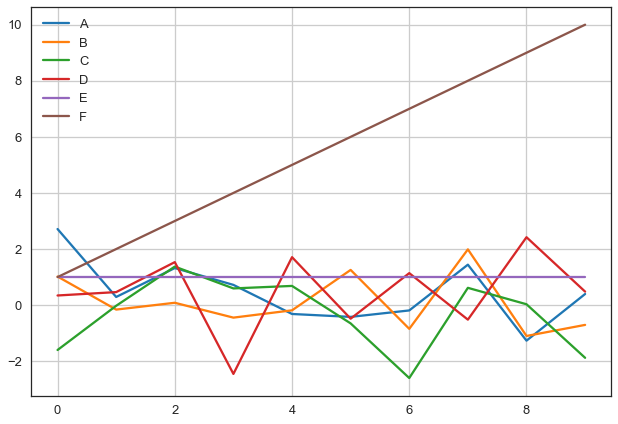

In [81]:
df.plot()
plt.grid()

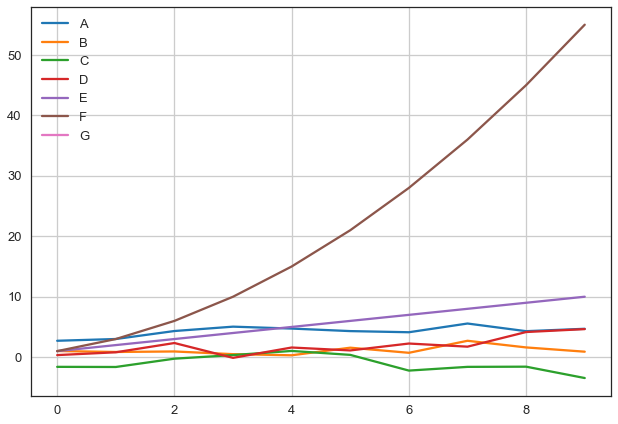

In [82]:
df.cumsum().plot()
plt.grid()

<a id='Shapely'></a>
# Shapely - Python package for computational geometry

Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium’s Simple Features Access Specification 1 and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems.

**Spatial Data Model**
The fundamental types of geometric objects implemented by Shapely are points, curves/lines, and surfaces. Each is associated with three sets of (possibly infinite) points in the plane. The interior, boundary, and exterior sets of a feature are mutually exclusive and their union coincides with the entire plane 2.

- A Point has an interior set of exactly one point, a boundary set of exactly no points, and an exterior set of all other points. A Point has a topological dimension of 0.

- A Curve has an interior set consisting of the infinitely many points along its length (imagine a Point dragged in space), a boundary set consisting of its two end points, and an exterior set of all other points. A Curve has a topological dimension of 1.

- A Surface has an interior set consisting of the infinitely many points within (imagine a Curve dragged in space to cover an area), a boundary set consisting of one or more Curves, and an exterior set of all other points including those within holes that might exist in the surface. A Surface has a topological dimension of 2.


<img src="../data/Images/shapely.png" width="800">

Source: https://shapely.readthedocs.io/en/latest/manual.html

## Points

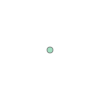

In [83]:
point = Point(0.0, 0.0)
point

In [84]:
type(point)

shapely.geometry.point.Point

In [85]:
point.bounds

(0.0, 0.0, 0.0, 0.0)

In [86]:
list(point.coords)

[(0.0, 0.0)]

## LineStrings

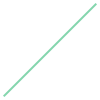

In [87]:
line = LineString([(0, 0), (2, 2)])
line

In [88]:
type(line)

shapely.geometry.linestring.LineString

In [89]:
line.length

2.8284271247461903

In [90]:
line.bounds

(0.0, 0.0, 2.0, 2.0)

In [91]:
len(line.coords)

2

In [92]:
list(line.coords)

[(0.0, 0.0), (2.0, 2.0)]

## MultiLineStrings

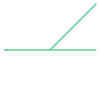

In [93]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

In [94]:
type(lines)

shapely.geometry.multilinestring.MultiLineString

In [95]:
lines.length

3.414213562373095

In [96]:
lines.bounds

(-1.0, 0.0, 1.0, 1.0)

In [97]:
len(lines.geoms)

2

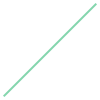

In [98]:
lines.geoms[0]

In [99]:
list(lines.geoms[0].coords)

[(0.0, 0.0), (1.0, 1.0)]

# Polygons

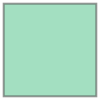

In [100]:
polygon = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
polygon

In [101]:
type(polygon)

shapely.geometry.polygon.Polygon

In [102]:
polygon.length

4.0

In [103]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

## Useful methods

In [104]:
polygon2 = Polygon([[0, 0], [2, 0], [2, 2], [0, 2], [0, 0]])

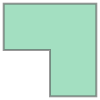

In [105]:
polygon2 - polygon

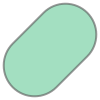

In [106]:
line.buffer(2)

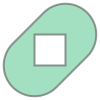

In [223]:
line.buffer(2) - polygon2

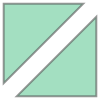

In [229]:
polygon2 - line.buffer(0.2)

<a id='geopandas'></a>
# GeoPandas 


<img src="../data/Images/geopandaslogo.png" width="100">

GeoPandas GeoDataFrames are Pandas DataFrames with an additional `geometry` column. This geometry column is also called a `GeoSeries`. It is a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

`GeoPandas` has three basic classes of geometric objects (which are actually `shapely` objects):

- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

<img src="../data/Images/vector.png" width="400">

Source: https://geopandas.org/data_structures.html, vebuso.com

In [107]:
gdf = gpd.read_file('../data/Test1/interfaces1.shp')
gdf.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

A `GeoDataFrame` has many different attributes. The most important ones are shown below.

In [108]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [109]:
gdf.geometry[:5]

0     POINT (19.150 293.313)
1     POINT (61.934 381.459)
2    POINT (109.358 480.946)
3    POINT (157.812 615.999)
4    POINT (191.318 719.094)
Name: geometry, dtype: geometry

In [110]:
gdf.geom_type[:5]

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [111]:
gdf.bounds.head()

minx   miny   maxx   maxy
0  19.15 293.31  19.15 293.31
1  61.93 381.46  61.93 381.46
2 109.36 480.95 109.36 480.95
3 157.81 616.00 157.81 616.00
4 191.32 719.09 191.32 719.09

In [112]:
gdf.total_bounds

array([   8.84067296,  164.9607695 ,  966.07357798, 1045.38823411])

In [113]:
gdf.is_valid[:5]

0    True
1    True
2    True
3    True
4    True
dtype: bool

As mentioned above, every entry of the `GeoDataFrame` is basically a shapely object, in this case a point:

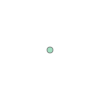

In [114]:
gdf.loc[0].geometry

In [115]:
type(gdf.loc[0].geometry)

shapely.geometry.point.Point

Depending on the geometry types in your GeoDataFrame other attributes may be available such as `gdf.length` to return the lengths of LineStrings or `gdf.area` to return the area of Polygons.

In [116]:
gdf.to_crs('EPSG:4326').head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

Text(130.36971370023429, 0.5, 'Y [m]')

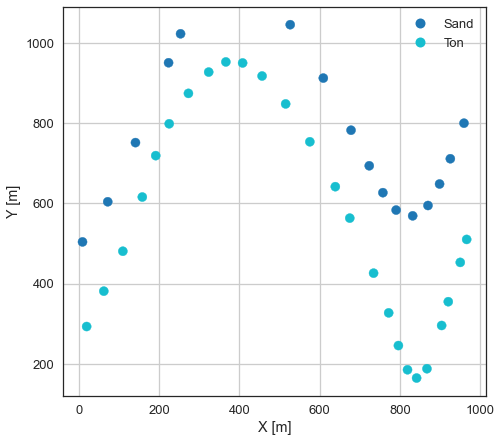

In [117]:
gdf.plot(aspect='equal', column='formation', legend=True)
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

In [118]:
x = np.arange(0,10,1)
y = np.arange(0,10,1)

df = pd.DataFrame([x,y]).T
df.columns = ['X','Y']
df['formation'] = 'Test'
df

X  Y formation
0  0  0      Test
1  1  1      Test
2  2  2      Test
3  3  3      Test
4  4  4      Test
5  5  5      Test
6  6  6      Test
7  7  7      Test
8  8  8      Test
9  9  9      Test

In [119]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs='EPSG:4326')
gdf

X  Y formation                 geometry
0  0  0      Test  POINT (0.00000 0.00000)
1  1  1      Test  POINT (1.00000 1.00000)
2  2  2      Test  POINT (2.00000 2.00000)
3  3  3      Test  POINT (3.00000 3.00000)
4  4  4      Test  POINT (4.00000 4.00000)
5  5  5      Test  POINT (5.00000 5.00000)
6  6  6      Test  POINT (6.00000 6.00000)
7  7  7      Test  POINT (7.00000 7.00000)
8  8  8      Test  POINT (8.00000 8.00000)
9  9  9      Test  POINT (9.00000 9.00000)

Text(169.07300000000004, 0.5, 'Y [°]')

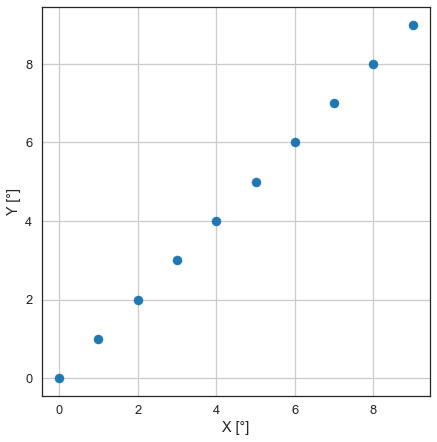

In [120]:
gdf.plot(aspect='equal')
plt.grid()
plt.xlabel('X [°]')
plt.ylabel('Y [°]')

<a id='rasterio'></a>
# Rasterio

Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.

Properties of the raster data stored in a GeoTIFF can be accessed through attributes of the opened dataset object. Some of these attributes are shown below.

<img src="../data/Images/raster.png" width="600">

Source: https://rasterio.readthedocs.io/en/latest/, https://desktop.arcgis.com/de/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm

In [121]:
raster = rasterio.open('../data/Test1/raster1.tif')
raster

<open DatasetReader name='../data/Test1/raster1.tif' mode='r'>

In [122]:
raster.read(1)

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

In [123]:
raster.read()

array([[[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
         622.05786],
        [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
         622.06714],
        [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
         622.08923],
        ...,
        [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
         366.3984 ],
        [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
         363.96167],
        [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
         361.78635]]], dtype=float32)

Text(0, 0.5, 'Y [m]')

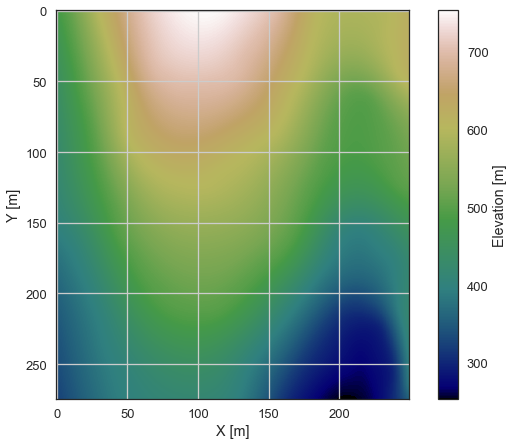

In [124]:
im = plt.imshow(raster.read(1), cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Elevation [m]')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

In [125]:
raster.count

1

In [126]:
raster.width #columns

250

In [127]:
raster.height #rows

275

In [128]:
raster.read().shape

(1, 275, 250)

In [129]:
raster.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

In [130]:
raster.bounds[2]

971.002897605575

The value of bounds attribute is derived from a more fundamental attribute: the dataset’s geospatial transform.

In [131]:
raster.transform

Affine(3.8840115904223, 0.0, -4.440892098500626e-16,
       0.0, -3.8840115904223, 1068.1031873661339)

A dataset’s transform is an affine transformation matrix that maps pixel locations in (row, col) coordinates to (x, y) spatial positions. The product of this matrix and (0, 0), the row and column coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner.

In [132]:
raster.transform * (0, 0)

(-4.440892098500626e-16, 1068.1031873661339)

The position of the lower right corner is obtained similarly.

In [133]:
raster.transform * (raster.width, raster.height)

(971.002897605575, 1.3642420526593924e-12)

In [134]:
raster.res

(3.8840115904223, 3.8840115904223)

In [135]:
raster.crs

CRS.from_epsg(4326)

In [136]:
z = raster.sample(np.array([100,100]))
z

<generator object sample_gen at 0x000002840521DDD0>

<a id='owslib'></a>
# OWSLib

OWSLib is a Python package for client programming with Open Geospatial Consortium (OGC) web service (hence OWS) interface standards, and their related content models.

<img src="../data/Images/onlineservices.png" width="600">

## Web Map Services

A Web Map Service (WMS) is a standard protocol developed by the Open Geospatial Consortium in 1999 for serving georeferenced map images over the Internet. These images are typically produced by a map server from data provided by a GIS database.

Source: https://en.wikipedia.org/wiki/Web_Map_Service

In [137]:
wms = WebMapService('https://ows.terrestris.de/osm/service?')
wms

In [138]:
wms.identification.type

'OGC:WMS'

In [139]:
wms.identification.version

'1.1.1'

In [140]:
wms.identification.title

'OpenStreetMap WMS'

In [141]:
wms.identification.abstract

'OpenStreetMap WMS, bereitgestellt durch terrestris GmbH und Co. KG. Beschleunigt mit MapProxy (http://mapproxy.org/)'

In [142]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get', 'url': 'https://ows.terrestris.de/osm/service?'}]

In [143]:
# The different formats a layer can be saved as
wms.getOperationByName('GetMap').formatOptions

['image/jpeg', 'image/png']

In [144]:
# Title of a layer
wms['OSM-WMS'].title

'OpenStreetMap WMS - by terrestris'

In [145]:
# Available CRS systems for a layer
wms['OSM-WMS'].crsOptions

['EPSG:3068',
 'EPSG:31466',
 'EPSG:3857',
 'EPSG:25833',
 'EPSG:5243',
 'EPSG:4326',
 'EPSG:4839',
 'EPSG:900913',
 'EPSG:25832',
 'EPSG:4686',
 'EPSG:3034',
 'EPSG:32648',
 'EPSG:4674',
 'EPSG:21781',
 'EPSG:4647',
 'EPSG:2100',
 'EPSG:31463',
 'EPSG:2180',
 'EPSG:29193',
 'EPSG:29192',
 'EPSG:4258',
 'EPSG:3035',
 'EPSG:31467',
 'EPSG:2056',
 'EPSG:31468']

In [146]:
# Available styles
wms['OSM-WMS'].styles

{'default': {'title': 'default',
  'legend': 'https://ows.terrestris.de/osm/service?styles=&layer=OSM-WMS&service=WMS&format=image%2Fpng&sld_version=1.1.0&request=GetLegendGraphic&version=1.1.1'}}

In [147]:
wms['OSM-WMS'].boundingBox

(-20037508.3428, -25819498.5135, 20037508.3428, 25819498.5135, 'EPSG:900913')

In [148]:
wms['OSM-WMS'].boundingBoxWGS84

(-180.0, -88.0, 180.0, 88.0)

In [149]:
wms['OSM-WMS'].opaque

0

In [150]:
wms['OSM-WMS'].queryable

1

In [151]:
wms_map = wms.getmap(layers=['OSM-WMS'], styles=['default'], srs='EPSG:4647', bbox=tuple([32286000, 5620000,32328000,5648000]),
                         size=tuple([4200, 2800]), format='image/png')

In [152]:
# Converting WMS map object to array
maps = io.BytesIO(wms_map.read())
wms_array = plt.imread(maps)

Text(32294500, 5629750, 'Aachen')

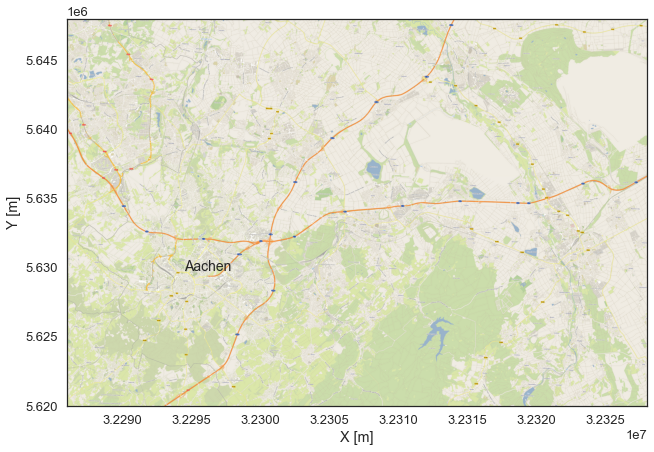

In [153]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [154]:
wms_map = wms.getmap(layers=['SRTM30-Colored-Hillshade'], styles=['default'], srs='EPSG:4647', bbox=tuple([32286000, 5620000,32328000,5648000]),
                         size=tuple([4200, 2800]), format='image/png')

In [155]:
# Converting WMS map object to array
maps = io.BytesIO(wms_map.read())
wms_array = plt.imread(maps)

Text(32294500, 5629750, 'Aachen')

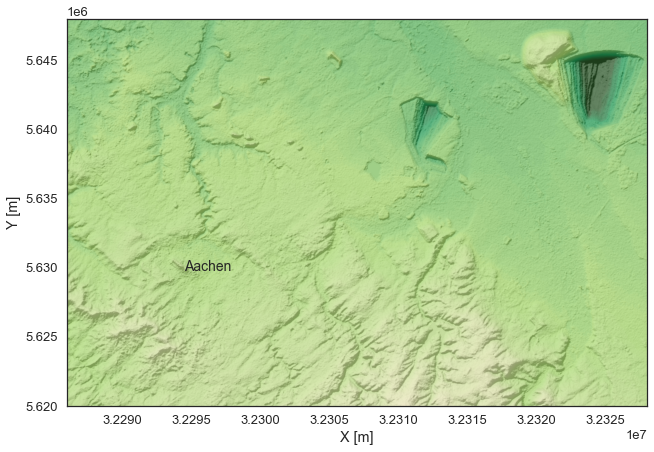

In [156]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [157]:
wms_array

array([[[0.56078434, 0.77254903, 0.5137255 ],
        [0.54901963, 0.7607843 , 0.5019608 ],
        [0.5568628 , 0.76862746, 0.5058824 ],
        ...,
        [0.49411765, 0.7490196 , 0.5058824 ],
        [0.49411765, 0.7490196 , 0.5058824 ],
        [0.49803922, 0.7529412 , 0.50980395]],

       [[0.49803922, 0.7176471 , 0.4627451 ],
        [0.5058824 , 0.7176471 , 0.4509804 ],
        [0.5058824 , 0.7176471 , 0.45490196],
        ...,
        [0.49803922, 0.7529412 , 0.50980395],
        [0.5019608 , 0.75686276, 0.5137255 ],
        [0.5019608 , 0.75686276, 0.5137255 ]],

       [[0.5058824 , 0.7294118 , 0.47058824],
        [0.5137255 , 0.72156864, 0.45882353],
        [0.50980395, 0.72156864, 0.45882353],
        ...,
        [0.49803922, 0.75686276, 0.5137255 ],
        [0.5019608 , 0.75686276, 0.5137255 ],
        [0.5019608 , 0.75686276, 0.5137255 ]],

       ...,

       [[0.76862746, 0.8745098 , 0.6117647 ],
        [0.7490196 , 0.8509804 , 0.5882353 ],
        [0.7490196 , 0

In [158]:
wms = WebMapService('https://www.wms.nrw.de/geobasis/wms_nw_dop')
wms

In [159]:
wms_map = wms.getmap(layers=['nw_dop_rgb'], styles=['default'], srs='EPSG:4647', bbox=tuple([32286000, 5620000,32328000,5648000]),
                         size=tuple([1400,933]), format='image/png')

In [160]:
# Converting WMS map object to array
maps = io.BytesIO(wms_map.read())
wms_array = plt.imread(maps)

Text(32294500, 5629750, 'Aachen')

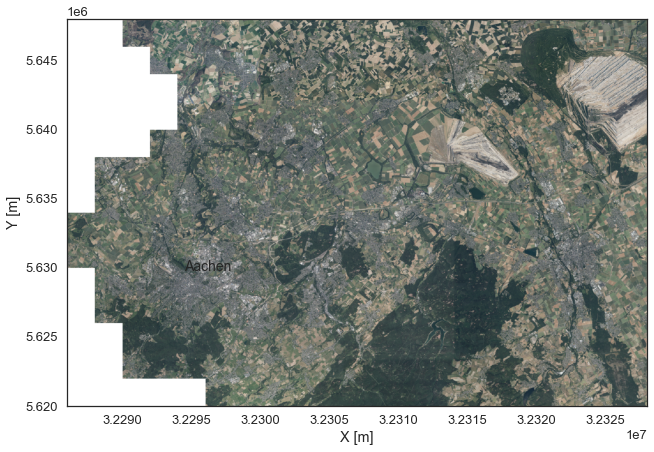

In [161]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

In [162]:
wms = WebMapService('http://www.wms.nrw.de/gd/GK100')
wms

In [163]:
wms_map = wms.getmap(layers=['0'], styles=['default'], srs='EPSG:4647', bbox=tuple([32286000, 5620000,32328000,5648000]),
                         size=tuple([1400,933]), format='image/png')

In [164]:
# Converting WMS map object to array
maps = io.BytesIO(wms_map.read())
wms_array = plt.imread(maps)

Text(32294500, 5629750, 'Aachen')

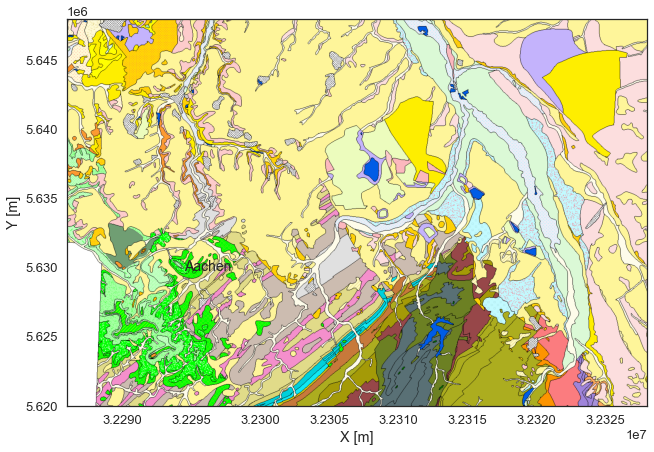

In [165]:
plt.imshow(wms_array, extent=[32286000, 32328000,5620000,5648000])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(32294500,5629750, 'Aachen', size = 14)

## Web Feature Service

In computing, the Open Geospatial Consortium Web Feature Service (WFS) Interface Standard provides an interface allowing requests for geographical features across the web using platform-independent calls. One can think of geographical features as the "source code" behind a map, whereas the WMS interface or online tiled mapping portals like Google Maps return only an image, which end-users cannot edit or spatially analyze. The XML-based GML furnishes the default payload-encoding for transporting geographic features, but other formats like shapefiles can also serve for transport. 

Source: https://en.wikipedia.org/wiki/Web_Feature_Service

In [166]:
wfs = WebFeatureService("https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=476&Service=WFS&")

In [167]:
type(wfs)

owslib.feature.wfs100.WebFeatureService_1_0_0

In [168]:
wfs.version

'1.0.0'

In [169]:
wfs.identification.version

'1.0.0'

In [170]:
wfs.identification.type

'Geophysik und Tiefohrungen'

In [171]:
wfs.identification.title

'Geophysik und Tiefohrungen'

In [172]:
wfs.identification.abstract

'Geophysik und Tiefohrungen'

In [173]:
list(wfs.contents)

['iwan:L383']

In [174]:
wfs['iwan:L383'].title

'Gravimetrie'

In [175]:
wfs['iwan:L383'].boundingBoxWGS84

(5.395175801132899, 47.16510247399335, 17.002272548448747, 54.85398076006903)

In [176]:
[op.name for op in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [177]:
wfs.getOperationByName('GetFeature').formatOptions

['{http://www.opengis.net/wfs}GML2']

In [178]:
wfs.getOperationByName('DescribeFeatureType').formatOptions

[]

In [179]:
wfs.getOperationByName('GetCapabilities').formatOptions

[]

In [180]:
url = "https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=476&Service=WFS&"

# Specify the parameters for fetching the data
params = dict(service='WFS', version=wfs.version, request='GetFeature',
              typeName=list(wfs.contents)[0], outputFormat='xml/gml2')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from request
feature = gpd.read_file(q)

In [181]:
feature.head()

gml_id  OBJECTID   ID              SURVEYNAME   ARCHIV  MESSJAHR  \
0   1541      1541  112             Jemgum 2007  0127494      2007   
1   1542      1542  111          Sagermeer 2005  0125831      2005   
2   1543      1543  120           Hümmling 2013  0131520      2013   
3   1544      1544   49  Rotenburg/Wümme (1984)  0112162      1984   
4   1545      1545  102        Odisheim 1989/90  0112092      1989   

                                      OPERATOR  \
0  GdF Produktion Exploration Deutschland GmbH   
1       ExxonMobil Production Deutschland GmbH   
2                GDF SUEZ E&P DEUTSCHLAND GMBH   
3       Deutsche Texaco AG Aufschluss und Gew.   
4                    BEB Erdgas und Erdöl GmbH   

                               OP_NACHFOL  \
0         Neptune Energy Deutschland GmbH   
1  ExxonMobil Production Deutschland GmbH   
2         Neptune Energy Deutschland GmbH   
3          Wintershall Dea Deutschland AG   
4      BEB Erdgas und Erdöl GmbH & Co. KG   

                               MESSFIRMA  MESSPUNKTE  \
0  Geophysik und Geotechnik Leipzig GmbH        1340   
1             Comp. Generale Geophysique        2803   
2       Deutsche Montan Technologie GmbH         342   
3                         Prakla Seismos        2184   
4                         Prakla Seismos        2824   

                     UP_DATE  \
0  2020-01-20T00:00:00+01:00   
1  2020-01-20T00:00:00+01:00   
2  2020-01-20T00:00:00+01:00   
3  2020-01-20T00:00:00+01:00   
4  2020-01-20T00:00:00+01:00   

                                            geometry  
0  MULTIPOLYGON (((32395246.839 5907777.660, 3239...  
1  MULTIPOLYGON (((32446717.522 5856710.088, 3244...  
2  MULTIPOLYGON (((32416592.825 5852885.544, 3241...  
3  POLYGON ((32545955.921 5896473.525, 32544536.2...  
4  POLYGON ((32504255.640 5967591.298, 32503387.8...

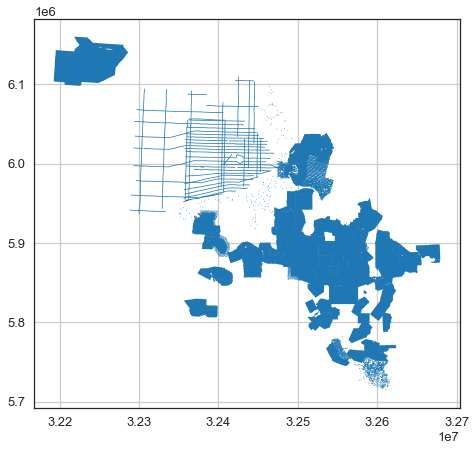

In [182]:
feature.plot()
plt.grid()

## Web Coverage Service

The Open Geospatial Consortium Web Coverage Service Interface Standard (WCS) defines Web-based retrieval of coverages – that is, digital geospatial information representing space/time-varying phenomena.

Source: https://en.wikipedia.org/wiki/Web_Coverage_Service

In [183]:
wcs = WebCoverageService('https://www.wcs.nrw.de/geobasis/wcs_nw_dgm')

In [184]:
wcs.url

'https://www.wcs.nrw.de/geobasis/wcs_nw_dgm'

In [185]:
wcs.version

'2.0.1'

In [186]:
xmin = 292000
xmax = 298000
ymin = 5626000
ymax = 5632000
size = 2000

x = xmax-xmin
print('Extent X: ', x, ' m')
y = ymax-ymin
print('Extent Y: ', y, ' m')

print('Number of tiles in X directions: ', int(x/size))
print('Number of tiles in Y directions: ', int(y/size))

extent = [292000,298000,5626000,5632000]

for i in tqdm(range(int(x/size))):
    for j in range(int(y/size)):
        if not os.path.exists('../../../tile_%d_%d_%d_%d.tif' % (xmin+i*size, xmin+(i+1)*size,ymin+j*size, ymin+(j+1)*size)):
            # Create URL for Request
            url = wcs.url + '?' + \
                  'REQUEST=GetCoverage' + '&' + \
                  'SERVICE=WCS' + '&' + \
                  'VERSION=' + str(wcs.version) + '&' + \
                  'COVERAGEID=' + 'nw_dgm' + '&' + \
                  'FORMAT=' + 'image/tiff' + '&' + \
                  'SUBSET=x(' + str(extent[0]) + ',' + str(extent[1]) + ')' + '&' + \
                  'SUBSET=y(' + str(extent[2]) + ',' + str(extent[3]) + ')' + '&' + \
                  'OUTFILE=' + 'test'
            urllib.request.urlretrieve(url, '../../../tile_%d_%d_%d_%d.tif' % (xmin+i*size, xmin+(i+1)*size,ymin+j*size, ymin+(j+1)*size))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

Extent X:  6000  m
Extent Y:  6000  m
Number of tiles in X directions:  3
Number of tiles in Y directions:  3


In [187]:
# Join paths to form path to files
source = os.path.join('../../../', 'tile*.tif')

# Create list of filepaths
filepaths = glob.glob(source)
filepaths

['../../..\\tile_292000_294000_5626000_5628000.tif',
 '../../..\\tile_292000_294000_5628000_5630000.tif',
 '../../..\\tile_292000_294000_5630000_5632000.tif',
 '../../..\\tile_294000_296000_5626000_5628000.tif',
 '../../..\\tile_294000_296000_5628000_5630000.tif',
 '../../..\\tile_294000_296000_5630000_5632000.tif',
 '../../..\\tile_296000_298000_5626000_5628000.tif',
 '../../..\\tile_296000_298000_5628000_5630000.tif',
 '../../..\\tile_296000_298000_5630000_5632000.tif']

In [188]:
src_files = []

# Open source files
for i in filepaths:
    src = rasterio.open(i)

    # Append files to list
    src_files.append(src)
    
src_files

[<open DatasetReader name='../../..\tile_292000_294000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_292000_294000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_292000_294000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_294000_296000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_294000_296000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_294000_296000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_296000_298000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_296000_298000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../..\tile_296000_298000_5630000_5632000.tif' mode='r'>]

In [189]:
# Merging tiles
mosaic, transformation = merge(src_files,
                               bounds=None,
                               res=None,
                               nodata=None,
                               precision=None,
                               indexes=None,
                               method='first')

# Swap axes and remove dimension
mosaic = np.flipud(np.rot90(np.swapaxes(mosaic, 0, 2)[:, 0:, 0], 1))
mosaic

array([[137.81, 137.86, 137.87, ..., 204.42, 204.45, 204.45],
       [137.76, 137.74, 137.79, ..., 204.43, 204.44, 204.48],
       [137.7 , 137.7 , 137.7 , ..., 204.42, 204.48, 204.5 ],
       ...,
       [152.37, 152.4 , 152.45, ..., 167.84, 167.85, 167.91],
       [152.41, 152.4 , 152.41, ..., 167.86, 167.89, 167.93],
       [152.5 , 152.48, 152.48, ..., 167.84, 167.85, 167.86]],
      dtype=float32)

Text(294500, 5629750, 'Aachen')

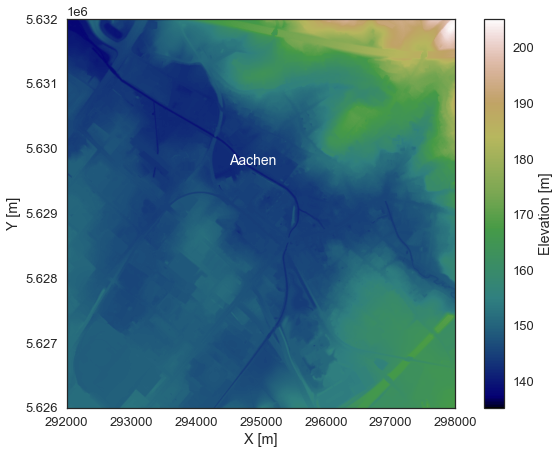

In [190]:
im = plt.imshow(mosaic, extent=[292000,298000,5626000,5632000], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Elevation [m]')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.text(294500,5629750, 'Aachen', size = 14, color='white')

<a id='pyvista'></a>
# PyVista -  3D plotting and mesh analysis

<img src="../data/Images/pyvista_logo.png" width="600">

PyVista (formerly vtki) is a helper module for the Visualization Toolkit (VTK) that takes a different approach on interfacing with VTK through NumPy and direct array access. This package provides a Pythonic, well-documented interface exposing VTK’s powerful visualization backend to facilitate rapid prototyping, analysis, and visual integration of spatially referenced datasets.

This module can be used for scientific plotting for presentations and research papers as well as a supporting module for other mesh dependent Python modules.

<img src="../data/Images/pyvistaexample.png" width="600">

Source: https://docs.pyvista.org/

In [191]:
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)

In [192]:
grid = pv.StructuredGrid(x, y, z)

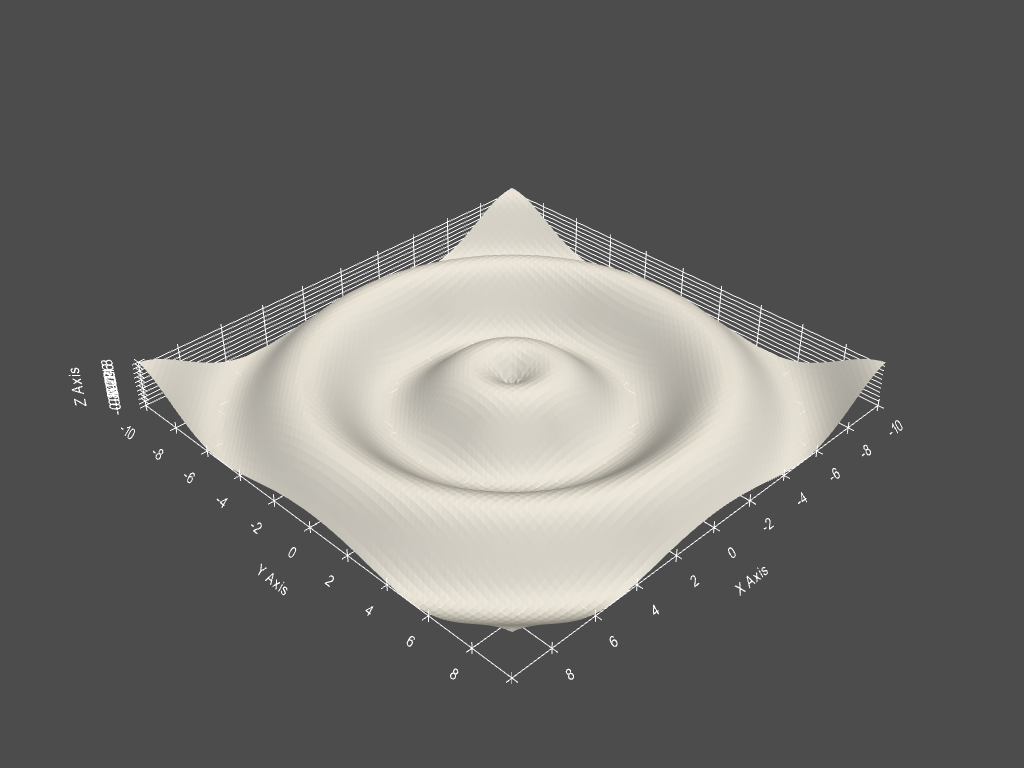

In [193]:
p = pv.Plotter(notebook=True)
p.add_mesh(grid)

p.show_grid(color='white')
p.show()

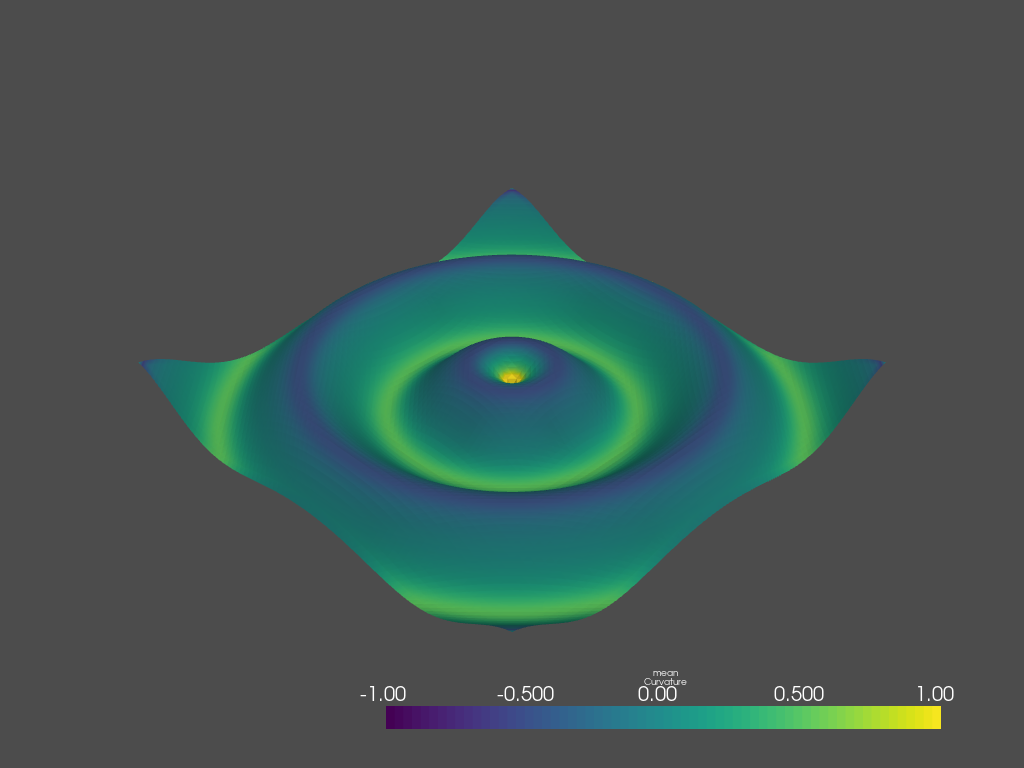

In [194]:
grid.plot_curvature(clim=[-1, 1])

<a id='gempy'></a>
# GemPy - Open-source, implicit 3D structural geological modeling

<img src="../data/Images/gempylogo.png" width="600">

GemPy is a Python-based, open-source geomodeling library. It is capable of constructing complex 3D geological models of folded structures, fault networks and unconformities, based on the underlying powerful implicit representation approach. GemPy was designed from the ground up to support easy embedding in probabilistic frameworks for the uncertainty analysis of subsurface structures.

Check out the documentation either in the main website gempy.org (better option), or the specific docs site at https://docs.gempy.org/

<img src="../data/Images/gempy.png" width="600">

Source: https://github.com/cgre-aachen/gempy

In [195]:
base_map = rasterio.open('../../gemgis/data/examples/example1/task1.tif')
interfaces = gpd.read_file('../../gemgis/data/examples/example1/interfaces1_lines.shp')
orientations = gpd.read_file('../../gemgis/data/examples/example1/orientations1.shp')
extent = gpd.read_file('../../gemgis/data/examples/example1/extent1.shp')
geological_map = gpd.read_file('../../gemgis/data/examples/example1/geolmap1.shp')
topo = gpd.read_file('../../gemgis/data/examples/example1/topo1.shp')
custom_section = gpd.read_file('../../gemgis/data/examples/example1/customsections1.shp')
topography = rasterio.open('../../gemgis/data/examples/example1/topo.tif')

In [196]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

geo_data.set_extent(gdf=extent, minz=300, maxz=800)
geo_data.set_resolution(50,50,50)
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.raw_i = interfaces
geo_data.raw_o = orientations
geo_data.basemap = base_map.read(1)
geo_data.geolmap = geological_map
cols = gg.utils.load_surface_colors('../../gemgis/data/examples/example1/style1.qml', geological_map)
geo_data.customsections = custom_section
geo_data.contours = topo

# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

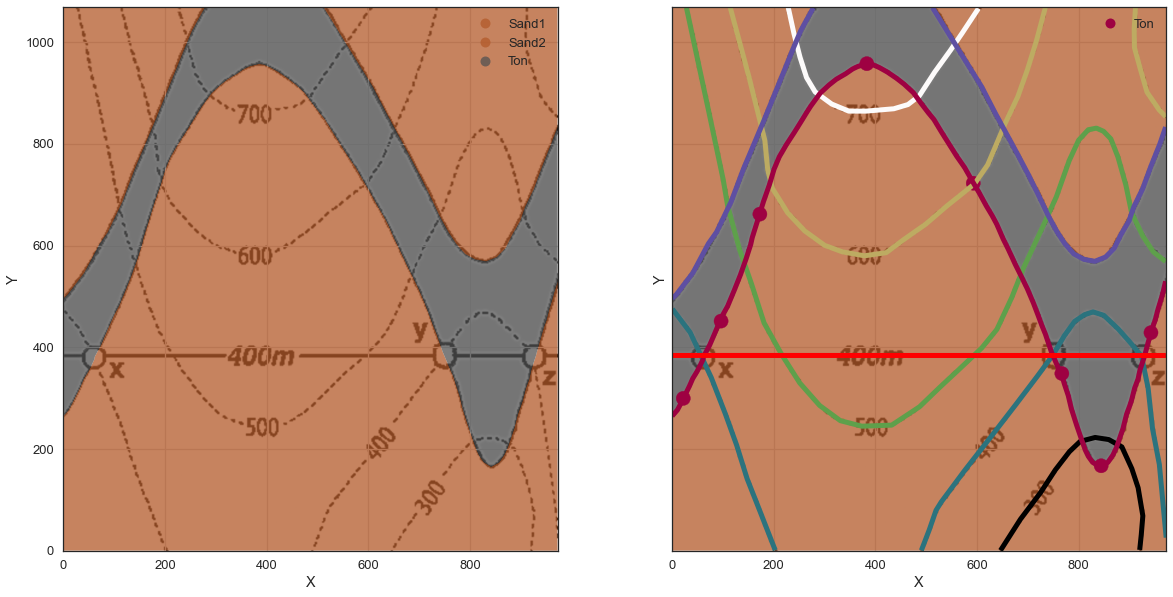

In [197]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

# Interpolate Topography

In [198]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
geo_data.raw_dem = np.flipud(dem)
geo_data.raw_dem

array([[479.25569795, 479.87822832, 480.51081617, ..., 623.92447752,
        624.37477606, 624.82564903],
       [478.9113727 , 479.53431484, 480.1673209 , ..., 623.8870041 ,
        624.33696638, 624.78749278],
       [478.57227615, 479.19563116, 479.82905526, ..., 623.85302909,
        624.30262569, 624.75277621],
       ...,
       [393.27639239, 393.22196212, 393.16835634, ..., 396.25151286,
        398.21571981, 400.17329448],
       [393.41982945, 393.36494645, 393.31088433, ..., 396.20694282,
        398.16690286, 400.12027997],
       [393.56371914, 393.50838517, 393.45386851, ..., 396.15856133,
        398.11421775, 400.06334288]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

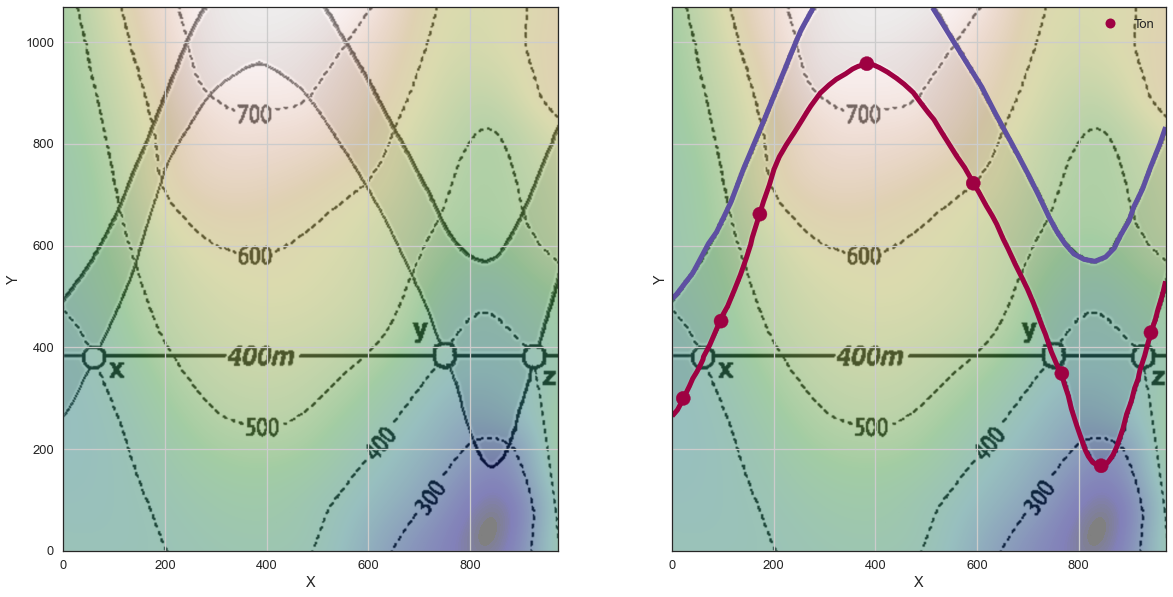

In [199]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Set Interfaces

In [200]:
interfaces_coords = gg.vector.extract_xyz(interfaces,topography,extent=geo_data.extent, drop_index=True)
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces.head()

index     X      Y      Z formation
0      0  0.26 264.86 387.26     Sand1
1      1 10.59 276.73 387.14     Sand1
2      2 17.13 289.09 387.38     Sand1
3      3 19.15 293.31 387.52     Sand1
4      4 27.80 310.57 388.50     Sand1

# Set Orientations

In [201]:
orientations_coords = gg.vector.extract_xyz(orientations,dem,extent=geo_data.extent)
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

index      X      Y      Z formation   dip  azimuth  polarity
0      0  96.47 451.56 477.73       Ton 30.50   180.00         1
1      1 172.76 661.88 481.73       Ton 30.50   180.00         1
2      2 383.07 957.76 444.45       Ton 30.50   180.00         1
3      3 592.36 722.70 480.57       Ton 30.50   180.00         1
4      4 766.59 348.47 498.96       Ton 30.50   180.00         1

In [202]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.to_surface_color_dict('../../gemgis/data/examples/example1/style1.qml', basement='Sand2')
geo_data.stack = {"Strat_Series": ('Sand1', 'Ton')}
geo_data.dem = '../../gemgis/data/examples/example1/raster1.tif'

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [203]:
geo_model = gp.create_model(geo_data.model_name)
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-11-07 13:34

In [204]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0     Sand1  Strat_Series               1  #015482   1
1       Ton  Strat_Series               2  #9f0052   2
2  basement  Strat_Series               3  #ffbe00   3

In [205]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [206]:
geo_model.set_topography(
    source='gdal', filepath='../../gemgis/data/examples/example1/raster1.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [207]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                                    stop resolution   dist
Section1  [1.372395262185787, 383.9794474025771]  [970.9954955186289, 383.8831909730347]  [100, 80] 969.62

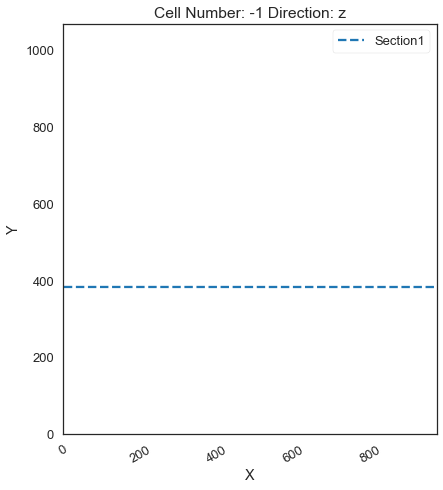

In [208]:
gp.plot.plot_section_traces(geo_model)

In [209]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1528.90
$C_o$           55655.83
drift equations      [3]


In [210]:
sol = gp.compute_model(geo_model, compute_mesh=True)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

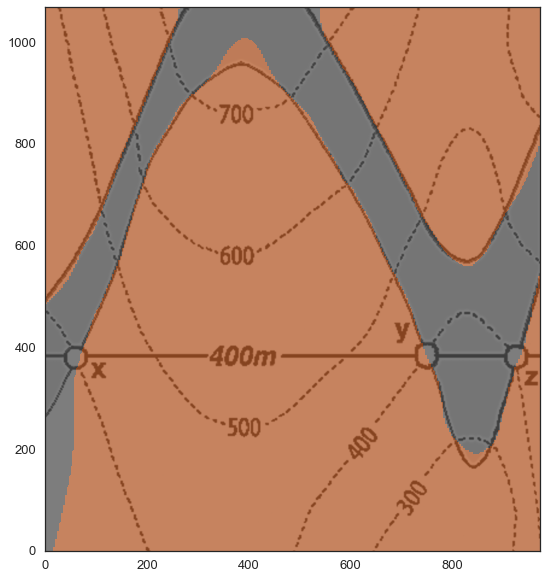

In [211]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252','#b35a2a' ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


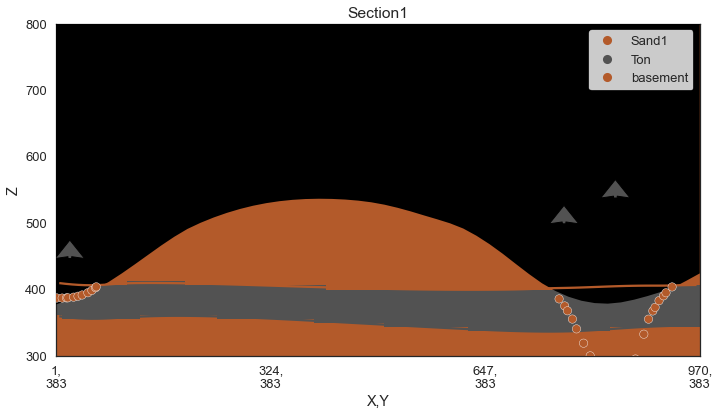

In [212]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


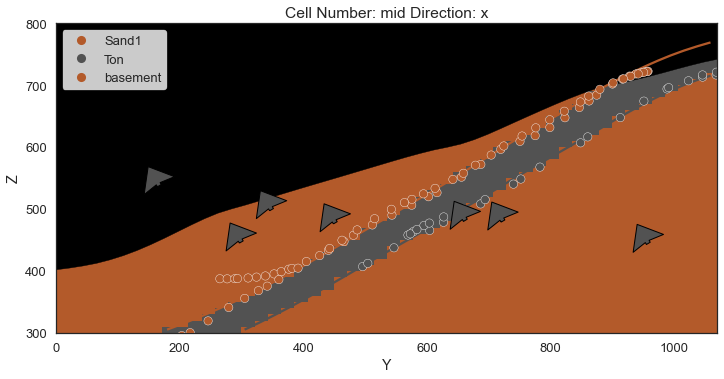

In [213]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


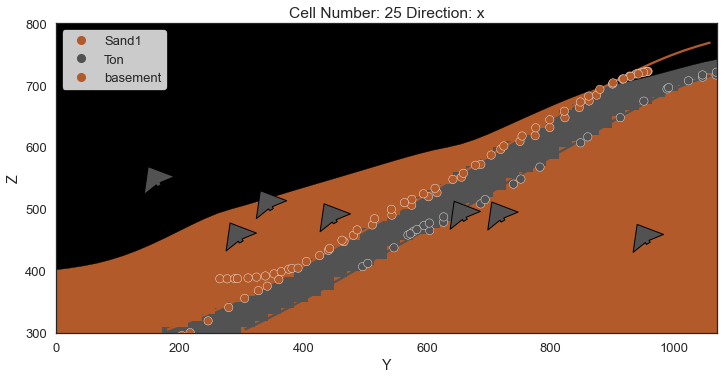

In [214]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


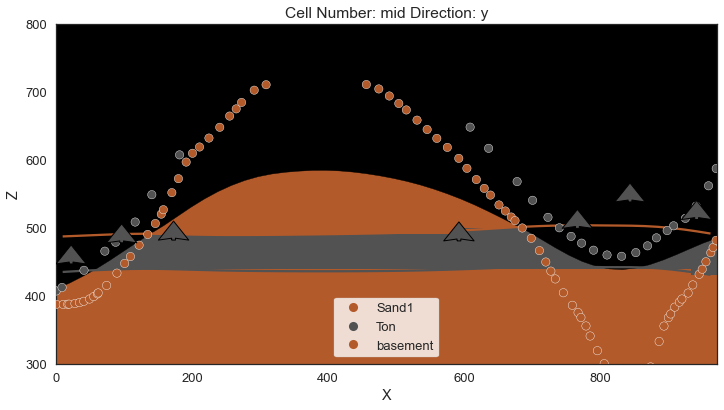

In [215]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

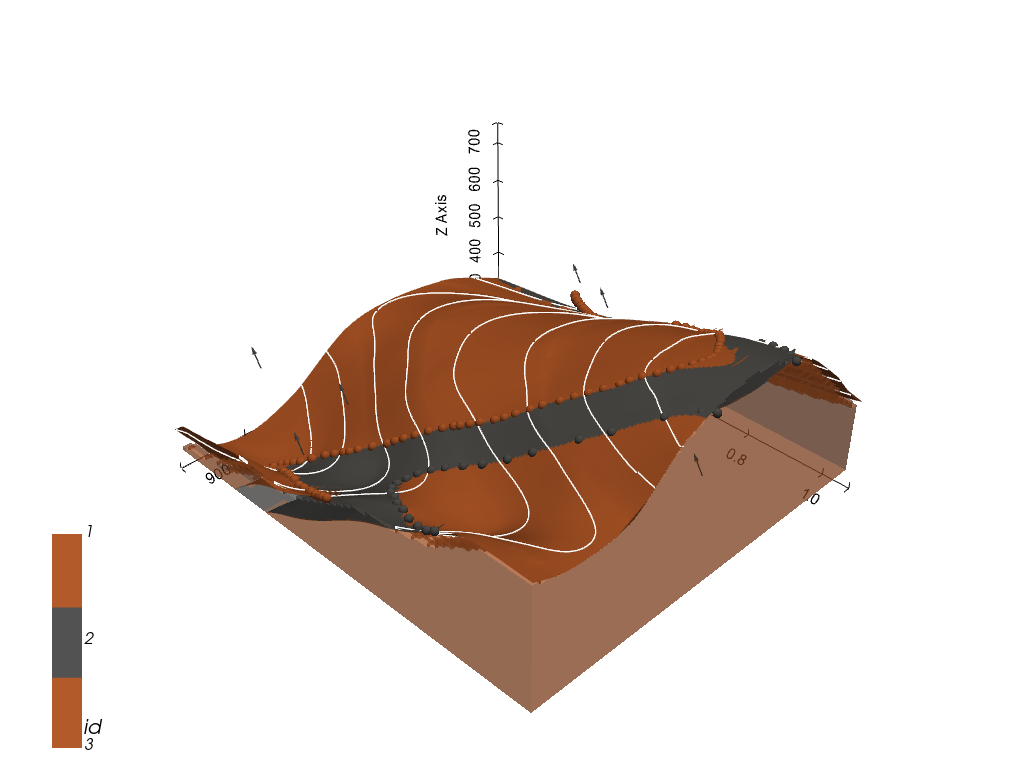

In [216]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

<a id='summary'></a>
# Summary

In this tutorial, we introduced the different essential packages for using `GemGIS`. If there are any further questions regarding these packages, we kindly refer to the documentations of these packages. 

Starting with the next tutorial, we are going to start introducing the different functionalities/functions/methods of `GemGIS` to process spatial data for subsequent geological modeling. 
